In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns

# load data

In [6]:
# tweetfile = 'HSR_1K.txt'
# df = pd.read_json(tweetfile)
df = pd.read_excel('datafile.xls')
print(list(df))
df.head(3)

[u'contributors', u'coordinates', u'created_at', u'display_text_range', u'entities', u'extended_entities', u'favorite_count', u'favorited', u'full_text', u'geo', u'id', u'id_str', u'in_reply_to_screen_name', u'in_reply_to_status_id', u'in_reply_to_status_id_str', u'in_reply_to_user_id', u'in_reply_to_user_id_str', u'is_quote_status', u'lang', u'place', u'possibly_sensitive', u'possibly_sensitive_appealable', u'quoted_status', u'quoted_status_id', u'quoted_status_id_str', u'quoted_status_permalink', u'retweet_count', u'retweeted', u'source', u'truncated', u'user']


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2018-07-19 15:39:04,"[0, 128]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,Malaysia to negotiate deferment of High-Speed ...,NaN,...,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,NaN,2018-07-19 15:38:38,"[0, 104]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,TMJ: Malaysia should not scrap HSR project - N...,NaN,...,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{u'follow_request_sent': False, u'has_extended..."
2,NaN,NaN,2018-07-19 09:00:50,"[0, 122]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,"In an interview with Channel News Asia, TMJ sa...",NaN,...,NaN,NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


# popularity

In [85]:
df['favorite_count'].describe()

count    815.000000
mean       1.990184
std       18.241282
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      468.000000
Name: favorite_count, dtype: float64

In [132]:
for thresh in range(0,12,2):
    print(thresh, len([i for i in df['favorite_count'] if i >thresh]))

(0, 189)
(2, 71)
(4, 48)
(6, 39)
(8, 31)
(10, 22)


In [112]:
df['favorite_count'].sum()

1622.0

In [108]:
most_faved_tweets = np.sort(df['favorite_count'])[::-1][:3]
for t in most_faved_tweets:
    print(df[df['favorite_count'] == t]['id'])

92    1006043372128120832
Name: id, dtype: int64
158    1001688511525908480
Name: id, dtype: int64
235    1001044866476883968
Name: id, dtype: int64


In [86]:
df['retweet_count'].describe()

count    815.000000
mean       2.279755
std       23.538567
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      625.000000
Name: retweet_count, dtype: float64

In [93]:
df[df['retweet_count'] == df['retweet_count'].max()]['id']

92    1006043372128120832
Name: id, dtype: int64

# geo

In [38]:
geo = [i['country'] for i in df['place'] if i is not None]
print(geo)
print(len(geo))

[u'Malaysia', u'Malaysia', u'Malaysia', u'Malaysia', u'Malaysia', u'Malaysia', u'Thailand', u'Malaysia', u'Malaysia', u'Taiwan', u'Malaysia', u'Malaysia', u'United States', u'United States', u'Taiwan', u'Malaysia', u'Malaysia', u'United States', u'Singapore', u'United States', u'Singapore', u'Malaysia']
22


# hashtags

('Unique tags:', 64)
('No. of tags:', 183)


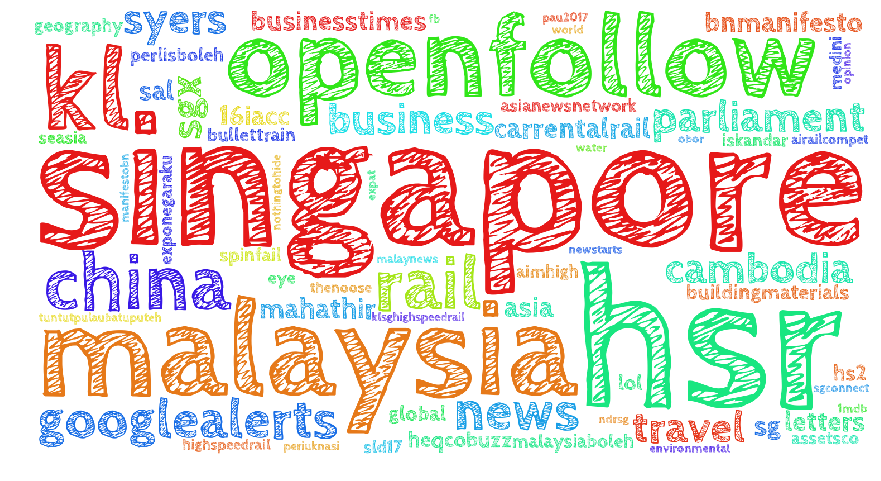

In [79]:
hashtags = [i['hashtags'] for i in df['entities'] if len(i['hashtags'])!=0]
tags = [i[0]['text'].lower() for i in hashtags]
tag_cloud = ' '.join(tags)
print('Unique tags:', len(np.unique(tags)))
print('No. of tags:', np.sum(tag_counts.values()))
plt.figure(figsize=(15,15))
wordcloud = WordCloud(font_path='fonts/Cabin/CabinSketch-Bold.ttf',
                      background_color='white',
                      width=1500,
                      height=800,
                      relative_scaling=0
                     ).generate(tag_cloud)

plt.imshow(wordcloud)
plt.axis('off');


In [78]:
tags = np.array(tags)
unique, counts = np.unique(tags, return_counts=True)
tag_counts = dict(zip(unique, counts))
sorted(tag_counts.items() ,key = lambda x:x[1],reverse=True)[:10]


[(u'singapore', 35),
 (u'hsr', 29),
 (u'malaysia', 18),
 (u'openfollow', 10),
 (u'kl', 8),
 (u'china', 5),
 (u'rail', 4),
 (u'googlealerts', 3),
 (u'news', 3),
 (u'parliament', 3)]

# text

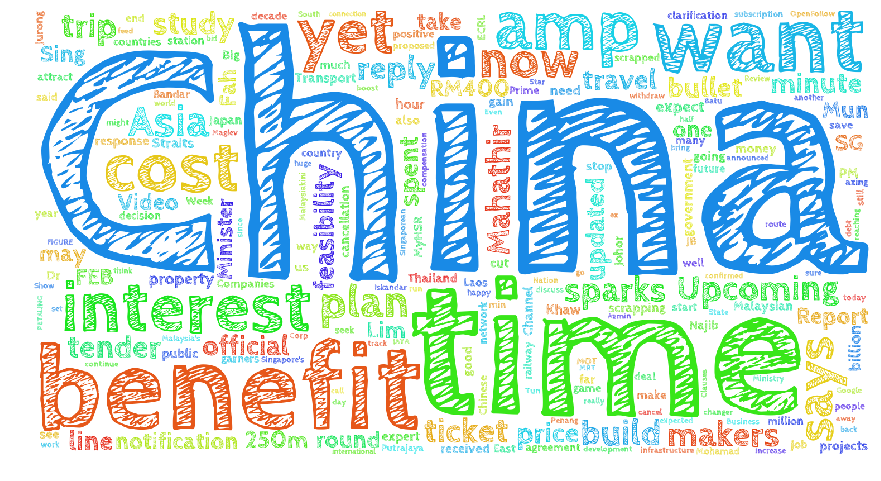

In [82]:
words = ' '.join(df['full_text'])

no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                            and 'bit.ly'not in word
                            and 'ow.ly'not in word
                            #and 'budget'not in word.lower()
                            and not word.startswith('@')
                            and word != 'RT'
                            ])

plt.figure(figsize=(15,15))
wordcloud = WordCloud(font_path='fonts/Cabin/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS.union({'pic','.org','.com',
                                                 'twitter','html','fb','singapore','will', 'malaysia',
                                                'HSR', 'High','speed', 'rail','s\'pore', 'm\'sia','kl','amp'
                                                'kuala', 'lumpur', 'project', 'link','train','new', 'Kuala', 'News',
                                                'say','via','&'}),
                      background_color='white',
                      width=1500,
                      height=800,
                      relative_scaling=0
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')

# plt.savefig('twitter_banner_3.png',dpi=300)
plt.show()


In [134]:
c = 0
for i in df['full_text']:
    if 'China' in i:
        c+=1
        print(c)
        print(i)
        print('\n--')

1
From Mongolia to Malaysia, Thailand to Turkmenistan &amp; Indonesia to Iran, a slew of Chinese projects, including power plants, solar farms, motorways, bridges, ports &amp; high-speed rail links, are set to be built with support from China’s banks and work force. https://t.co/xyj22zeY63

--
2
Singapore has spent more than S$250m on High-Speed Rail; no reply from Malaysia yet: Khaw 

Hilarious guest comment that I like: 
“Let see if bolehland (Malaysia) can escape China demand for compensation. Hope China will give Dr M 2 black eyes.” 😂👍🏼 https://t.co/6ytur4HbdT

--
3
Africa should learn from new government in Malaysia where they cut Chinese help and cancelled high speed rail saving from debt trap laid by China.

--
4
"A year from now, 2 years from now ... it's something that we need to discuss". The KL-Singapore HSR may be revived in future but for now, Malaysia is hopeful China and Singapore will understand the state of its debt and the need to review mega projects. https://t.co/HM